In [1]:
import multiprocessing as mp
import os, sys
import time
from multiprocessing.context import Process

import cv2

from text_renderer.config import get_cfg, GeneratorCfg
from text_renderer.dataset import ImgDataset
from text_renderer.render import Render
import matplotlib.pyplot as plt
import numpy as np

sys.path.append('../')

from playdict_ocr.datasets import RecognizationDataset

In [2]:
from text_renderer.effect import *
from text_renderer.corpus import *
from text_renderer.config import (
    RenderCfg,
    NormPerspectiveTransformCfg,
    GeneratorCfg,
    SimpleTextColorCfg,
)

In [3]:
import pathlib
from word_generator import GameOcrCorpus

render_cfg,=RenderCfg(
    bg_dir=pathlib.Path("bg"),
    height=32,
    perspective_transform=NormPerspectiveTransformCfg(20, 20, 1.5),
    corpus=GameOcrCorpus(
        RandCorpusCfg(
            font_dir=pathlib.Path("font"),
            font_size=(16, 30),
        ),
    ),
    #corpus_effects=Effects(Line(0.9, thickness=(2, 5))),
    gray=True
),

render = Render(render_cfg)

In [4]:
def generate_img():
    img, label = render()
    img = 255 - img
    pad_cnt = np.random.randint(0, 24, size=[2, 2])
    img = np.pad(img, pad_cnt)
    img = cv2.resize(img, (160, 32))
    return img, label

In [5]:
def show_img(img, label=None):
    plt.imshow(img)
    plt.ylim(32, 0)
    if label is not None:
        plt.title(label)

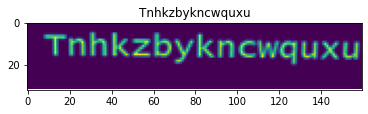

In [6]:
show_img(*generate_img())

In [7]:
from tqdm import trange

cnt = 2000000

data, tgt = [], []

for _ in trange(cnt):
    img, label = generate_img()
    data.append(img)
    tgt.append(label)

dataset = RecognizationDataset(data, tgt)

  0%|          | 3855/2000000 [00:31<4:58:16, 111.54it/s]

In [ ]:
dataset.to_pickle('synth_1.pkl')